python 3.7

In [1]:
# 命名惯例
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

In [3]:
import numpy as np

data = {i: np.random.randn() for i in range(7)}
data

{0: -0.564153338979443,
 1: -0.3152098832641384,
 2: -0.9450266999878917,
 3: 1.0024519997582744,
 4: -1.2231766935304123,
 5: -0.5985015337834159,
 6: 1.3766831358535485}

In [4]:
from numpy.random import randn

data = {i: randn() for i in range(7)}
print(data)

{0: -2.5151131942555818, 1: -1.2178655810146717, 2: 0.8766400044662629, 3: -1.9853697905559144, 4: 0.04216844698217673, 5: 0.0342077601602772, 6: 1.0733887130068032}


In [8]:
#用%timeit计算Python语句的执行时间。
a = np.random.randn(100,100)
%timeit np.dot(a,a)

188 µs ± 22.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


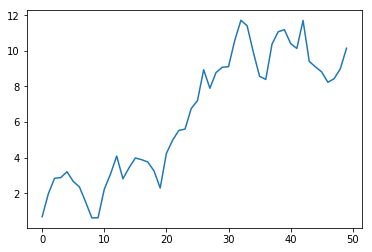

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.random.randn(50).cumsum())

In [12]:
# 变量和参数传递
a = [1,2,3]
b = a # python中，a和b指向同一个对象
a.append(4)
b

[1, 2, 3, 4]

In [13]:
def append_element(some_list, element):
    some_list.append(element)

data = [1,2,3]
append_element(data,4)
data

[1, 2, 3, 4]

In [19]:
# 变量类型
a = 5
print('the type of a: ',type(a))
b = 'foo'
print('the type of b: ',type(b))
print('a is {0}, b is {1}'.format(type(a),type(b)))
type(b)

the type of a:  <class 'int'>
the type of b:  <class 'str'>
a is <class 'int'>, b is <class 'str'>


str

In [22]:
# isinstance检查对象是否为某种类型的实例
print(isinstance(a,int))
print(isinstance(b,(int, float, str)))

True
True


In [27]:
# getattr，通过名字访问属性和方法
getattr(b,'format')

<function str.format>

In [30]:
# 鸭子类型：只关心对象是否有某些方法或用途，而不关心对象的类型
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError: # not iterable
        return False

print(isiterable('a string'))
print(isiterable([1,2,3]))
print(isiterable(5))

True
True
False


In [36]:
x = '4'
if not isinstance(x, list) and isiterable(x):
    x = list(x)
    print(isiterable(x))

True


In [42]:
# 判断两个引用是否指向同一个对象，is 或 is not。==
a = [1,2,3]
b = a
c = list(a) # list创建一个新的列表（复制）
print(a is b)
print(a is not c)
print(a == c)
print(a is None)
print(a is not None)

True
True
True
False
True


**可变与不可变对象**

python中的大多数对象，如列表、字典、numpy数组，和用户自定义的类型，都是可变的。即这些对象或包含的值是可以被修改的。

其他，如字符串和元组，是不可变的。

In [44]:
a_list = ['foo', 2, [7,5]]
a_list[2] = (0,4)
a_list

['foo', 2, (0, 4)]

In [45]:
a_tuple = (3, 7, (1,9))
a_tuple[1] = 'foo'

TypeError: 'tuple' object does not support item assignment

In [47]:
# 字符串
a = 'one way of writing a string'
b = "another way"
c = """
This is a longer string that spans multiple lines
"""
print(c.count('\n'))

2


In [48]:
b = a.replace('string', 'longer string')
b

'one way of writing a longer string'

In [50]:
# 使用str将对象转化为字符串
a = 5.4
s = str(a)
print(s)
print(type(s))

5.4
<class 'str'>


In [52]:
s = 'python'
print(list(s))
list(s)

['p', 'y', 't', 'h', 'o', 'n']


['p', 'y', 't', 'h', 'o', 'n']

In [53]:
s[:3] # 切片

'pyt'

In [54]:
s = '12\\34' # 反斜杠，用来表示特殊字符
print(s)

12\34


In [55]:
# 在字符串前面加r，表示字符就是其自身。r表示raw。
s = r'this\has\no\special\characters'
s

'this\\has\\no\\special\\characters'

In [56]:
# 字符串合并
a = 'this is the first half'
b = 'and this is the second half'
a + b

'this is the first halfand this is the second half'

In [57]:
# 字符串对象有format方法，可以替换格式化的参数为字符串
template = '{0:.2f} {1:s} are worth US${2:d}'
template.format(4.55560, 'Argentine Pesos', 1)

'4.56 Argentine Pesos are worth US$1'

In [62]:
# encode 编码；
# 若知道某个对象的Unicode编码，可用 decode 解码。
val = "español"
print('val: ',val)
val_utf8 = val.encode('utf-8')
print('val_utf8: ', val_utf8)
print('type of val_utf8: ',type(val_utf8))

val_utf8.decode('utf-8')

val:  español
val_utf8:  b'espa\xc3\xb1ol'
type of val_utf8:  <class 'bytes'>


'español'

In [66]:
bytes_val = b'this is bytes'
print(bytes_val)

decoded = bytes_val.decode('utf-8')
print(decoded) # this is str (Unicode) now

b'this is bytes'
this is bytes


In [68]:
# None，空值类型。如果一个函数没有明确的返回值，则默认返回None。
a = None
print(a is None)
print(a is not None)

# None 作为函数的默认参数
def add_and_maybe_multiply(a, b, c=None):
    result = a + b
    
    if c is not None:
        result = result * c
    
    return result

True
False


In [69]:
# None 不仅是一个保留字，还是唯一的NoneType的实例
type(None)

NoneType

**日期和时间**

python内建的 *datetime* 模块提供 *datetime* 、*date* 和 *time* 类型。*datetime* 类型结合了*date* 和 *time* ，比较常用。

In [71]:
from datetime import datetime, date, time
dt = datetime(2011,10,29,20,30,21)
print('day: ',dt.day)
print('minute: ', dt.minute)
print('year: ', dt.year)

day:  29
minute:  30
year:  2011


In [74]:
print(dt.date())
dt.date()

2011-10-29


datetime.date(2011, 10, 29)

In [75]:
print(dt.time())
dt.time()

20:30:21


datetime.time(20, 30, 21)

In [77]:
# strftime 将datetime格式化为字符串
dt.strftime('%m/%d/%Y %H:%M')

'10/29/2011 20:30'

In [78]:
# strptime 将字符串转换为datetime对象
datetime.strptime('20090312', '%Y%m%d')

datetime.datetime(2009, 3, 12, 0, 0)

当你聚类或对时间序列进行分组，替换datetimes字段有时会很有用。如，用 0 替换分和秒。

In [79]:
dt.replace(minute=0, second=0)

datetime.datetime(2011, 10, 29, 20, 0)

因为datetime.datetime 是不可变类型，所以上述方法会产生新的对象。

两个datetime对象的差会产生一个datetime.timedelta类型。

In [80]:
dt2 = datetime(2010,12,14,22,30)
delta = dt - dt2
delta

datetime.timedelta(318, 79221)

In [81]:
type(delta)

datetime.timedelta

结果timedelta(318,79221)指明timedelta将318、79221的编码方式。

若timedelta添加到datetime，会产生一个新的偏移datetime。

In [82]:
dt

datetime.datetime(2011, 10, 29, 20, 30, 21)

In [83]:
dt + delta

datetime.datetime(2012, 9, 12, 18, 30, 42)

**控制流**

python 有若干内建的关键字进行条件逻辑、循环和其他控制流操作。

- if、elif和else。
- for 循环
- while 循环
- pass
- range

In [85]:
# for循环，可用continue使for循环提前，跳过剩下的部分。
sequence = [1, 2, None, 4, None, 5]
total = 0
for value in sequence:
    if value is None:
        continue
    total += value
print('total: ', total)

total:  12


In [86]:
# 用break 跳出for循环。
sequence = [1,2,0,4,6,5,2,1]
total_until_5 = 0  # 将各元素相加，直到遇到5
for value in sequence:
    if value == 5:
        break
    total_until_5 += value
print(total_until_5)

13


In [88]:
# break 只中断for循环的最内层，其余的的for循环仍会运行。
for i in range(4):
    for j in range(4):
        if j > i:
            break
        print((i,j))

(0, 0)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)
(3, 3)


In [91]:
# while循环指定了条件和代码，当条件为False或用break退出循环，代码才会退出。
x = 256
total = 0
while x > 0:
    if total > 500:
        break
    total += x
    x = x // 2

print('total: %r, x: %r' % (total, x))

total: 504, x: 4


In [92]:
# pass，非操作语句。作为未执行代码的占位符。
if x < 0:
    print('negative!')
elif x == 0:
    # TODO: put something smart here
    pass
else:
    print('positive!')

positive!


In [94]:
# range 函数返回一个迭代器，其产生一个均匀分布的整数序列。
range(11)

range(0, 11)

In [95]:
list(range(11))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [96]:
# range(起点，终点，步进)
list(range(0, 20, 2))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [97]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [98]:
# range 产生的整数不包括终点。range的常见用法是用序号迭代序列。
seq = [1,2,3,4]
for i in range(len(seq)):
    val = seq[i]

In [99]:
# 用list 来存储range在其他数据结构中生成的所有整数，默认的迭代器形式通常是你想要的。
sum = 0
for i in range(100000):
    # % is the modulo opertor
    if i % 3 == 0 or i % 5 == 0:
        sum += i

**三元表达式**

可将if-else语句放到一行里。使用三元表达式可以压缩代码，但会降低代码可读性。

语法：*value = true-expr if condition else false-expr*

In [100]:
x = 5
'Non-negative' if x >= 0 else 'Negative'

'Non-negative'